# Temas Tratados en el Trabajo Práctico 8

* Aprendizaje estadístico.

* Evolución de la verosimilitud de una hipótesis en función de observaciones.

* Aprendizaje no supervisado. Algoritmo K-means.

* Aprendizaje supervisado. Algoritmo Knn.

* Aprendizaje por refuerzo. Algoritmo Q-Learning.

## Ejercicios Teóricos

1. Un fabricante de tornillos vende cajas que contienen 1000 tornillos de cabeza redonda con tres tipos de recubrimiento electrolítico (cincado, cobre y níquel). Cada caja se rellena
con diferentes proporciones que pueden variar de la siguiente manera:

&emsp;&emsp;a: Todos los tornillos están recubiertos de níquel. 15 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;b: El 70% de los tornillos están recubiertos de níquel, el 20% de cobre, el resto está cincado. 15 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;c: El 50% de los tornillos están recubiertos de níquel, el 25% de cobre y el resto está cincado. 50 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;d: El 20 % de los tornillos están recubiertos de níquel, el 50% de cobre y el resto está cincado. 10 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;e: Todos los tornillos están recubiertos de cobre. 10 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;1.1 ¿Cuál es la distribución a priori sobre las hipótesis?

**Hipótesis : tipo de caja**

Caja tipo a: 100% níquel    =>  P(Ha)= 0.15

Caja tipo b: 70% níquel, 20% cobre, 10% cinc    => P(Hb)= 0.15

Caja tipo c: 50% níquel, 25% cobre, 25% cinc    => P(Ha)= 0.5

Caja tipo d: 20% níquel, 50% cobre, 30% cinc    => P(Ha)= 0.1   

Caja tipo e: 100% cobre     => P(Ha)= 0.1

&emsp;Considerando que los 10 primeros tornillos que se extraen de una caja de muestra son de cobre:

&emsp;&emsp;1.2 Calcule la probabilidad de cada hipótesis dado que los 10 primeros tornillos fueron de cobre.

**Probabilidad de cada caja luego de 10 tornillos**

P(Ha|d=10):	0

P(Hb|d=10):	1,53449E-07

P(Hc|d=10):	4,7637E-06

P(Hd|d=10):	0,000975605

P(He|d=10):	0,999019478


&emsp;&emsp;1.3 Grafique la evolución de la verosimilitud de cada hipótesis en función del número de tornillos extraídos de la caja.

!["imagen"](grafico.png)

&emsp;&emsp;1.4 Para cada hipótesis, ¿cuál es la probabilidad de que el cuarto tornillo extraído sea de cobre?

!["4Tornillos"](tabla.png)

2. ¿Qué diferencia principal existe entre un algoritmo supervisado y un algoritmo no supervisado?

**Algoritmo supervisado**
Aprende a partir de ejemplos etiquetados. Es decir, cada dato de entrada viene acompañado de la respuesta correcta (la etiqueta o clase). El objetivo es que el modelo aprenda una función de mapeo f(x) que prediga la salida 𝑦 para nuevas entradas.

Ejemplo: KNN (k vecinos más cercanos), que necesita saber de antemano a qué clase pertenece cada punto de entrenamiento para luego clasificar nuevos datos.

**Algoritmo no supervisado**

Aprende a partir de datos sin etiquetas. No se le dice explícitamente cuál es la categoría o salida correcta. El objetivo es encontrar estructuras, patrones o agrupamientos en los datos.

Ejemplo: k-means, que agrupa puntos en clústeres basándose en su similitud sin que se le indique de antemano las categorías.

## Ejercicios de implementación

3. Genere un conjunto de 23 puntos que contengan coordenadas *xy* aleatorias con valores contenidos en el intervalo [0, 5] y grafique los puntos obtenidos en un gráfico.

&emsp;&emsp;3.1 Implemente un algoritmo K-means que clasifique 20 de los puntos en 2 grupos y grafique el resultado asignando un color a cada uno.

In [2]:
# Importo Librerias
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Tuple, List
import random

# ------------------- FUNCIONES AUXILIARES -----------------------

def generar_puntos_2d(
        n: int = 23,
        x_range: Tuple[float, float] = (0, 5),
        y_range: Tuple[float, float] = (0, 5),
        random_state: Union[int, None] = None,
):
    """
    Genera n puntos 2D aleatorios en el rango especificado

    Parametros:
        * n: numero de puntos a generar
        * x_range: Rango para coordenadas x
        * y_range: Rango para coordenadas y
        * random_state: Semilla para reproductibilidad (opcional)

    Retorna:
        * puntos: Puntos generados en formato array (column_stack)
    """
    # Pasar la semilla a random de numpy
    if random_state is not None:
        np.random.seed(random_state)

    # Generar coordenadas
    x = np.random.uniform(x_range[0], x_range[1], n)
    y = np.random.uniform(y_range[0], y_range[1], n)

    # Formatear salida
    return np.column_stack((x, y))


def dividir_datset(
        puntos: np.ndarray,
        n_entrenamiento: int = 20,
        random_state: Union[int, None] = None
) ->  Tuple[np.ndarray, np.ndarray]:
    """
    Divide el dataset en conjuntos de entrenamiento y prueba

    Parametros:
        * puntos: Array con todos los puntos (nx2)
        * n_entrenamiento: num de puntos para entrenamiento
        * random_state: semilla para reproductibilidad

    Retorna:
        * entrenamiento: puntos de entrenamiento
        * prueba: puntos de prueba
    """

    if random_state is not None:
        np.random.seed(random_state)

    return puntos[:n_entrenamiento], puntos[n_entrenamiento:]

In [3]:
class KMeans:
    def __init__(self,
                 n_clusters: int = 2,
                 max_iter: int = 50,
                 tol: float = 1e-4,
                 random_state: Union[int, None] = None
                 ):
        """
        Constructor del algoritmo K-Means
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state


        # Atributos que se estableceran durante el ajuste
        self.centroides = None
        self.labels = None
        self.inercia_ = None
        self.n_iter_ = 0
        self.historial_centroides = [] # Para tracking

        if random_state is not None:
            np.random.seed(random_state)

    def __repr__(self) -> str:
        return f"KMeans(n_clusters={self.n_clusters}, max_iter={self.max_iter})"
    
    def _calcular_distancias(self,
                             puntos: np.ndarray,
                             centroides: np.ndarray) -> np.ndarray:
        """
        Calcula la distancia euclideana entre cada punto y cada centroide

        Retorna:
            * distancias (n_puntos, n_clusters).
        """
        
        # Verificar dimensiones
        if puntos.ndim != 2 or centroides.ndim != 2:
            raise ValueError("Tanto puntos como centroides deben ser arrays 2D")
        
        # Usando broadcasting para calculo eficiente
        distancias = np.sqrt(np.sum((puntos[:, np.newaxis, :] - centroides[np.newaxis, :, :]) ** 2, axis=2))

        return distancias
    
    def _inicializar_centroides(self, puntos: np.ndarray) -> np.ndarray:
        """
        Inicializa los centroides seleccionando puntos aleatorios del dataset
        """

        # Tomo cantidad de puntos
        n_puntos = puntos.shape[0]

        # Valido que tenga mas puntos que clusters
        if n_puntos < self.n_clusters:
            raise ValueError(f"No hay suficientes puntos ({n_puntos}) para ({self.n_clusters}) clusters")

        # Seleccionar indices aleatorios unicos
        indices = np.random.choice(n_puntos, self.n_clusters, replace=False)
        centroides = puntos[indices]

        return centroides
    
    def _asignar_clusters(self, puntos: np.ndarray, centroides: np.ndarray) -> np.ndarray:
        """
        Asigna cada punto al cluster del centroide mas cercano
        """

        distancias = self._calcular_distancias(puntos, centroides)
        labels = np.argmin(distancias, axis=1)
        return labels
    
    def _actualizar_centroides(self, puntos: np.ndarray, labels: np.ndarray) -> np.ndarray:
        """
        Actualiza los centroides con la media de los puntos asignados a cada cluster.

        Retorna:
            * nuevos_centroides: np.ndarray
        """

        n_features = puntos.shape[1]
        nuevos_centroides = np.zeros((self.n_clusters, n_features))

        for i in range(self.n_clusters):
            puntos_cluster = puntos[labels == i]
            
            if len(puntos_cluster) > 0:
                nuevos_centroides[i] = np.mean(puntos_cluster, axis=0)
            else:
                # Cluster vacío - reinicializar con un punto aleatorio
                print(f"⚠️  Cluster {i} está vacío, reinicializando...")
                nuevos_centroides[i] = puntos[np.random.randint(0, len(puntos))]
        
        return nuevos_centroides
    
    def _calcular_inercia(self,
                          puntos: np.ndarray,
                          labels: np.ndarray,
                          centroides: np.ndarray) -> float:
        
        """
        Calcula la inercia (suma de distancias al cuadrado a los centroides)
        """
        inercia = 0.0
    
        for i in range(self.n_clusters):
            puntos_cluster = puntos[labels == i]
            if len(puntos_cluster) > 0:
                # Calcular distancia de cada punto al centroide de su cluster
                distancias = np.linalg.norm(puntos_cluster - centroides[i], axis=1)
                inercia += np.sum(distancias ** 2)
        
        return inercia
    
    def ajustar(self, puntos:np.ndarray) -> 'KMeans':
        """
        Ajusta el modelo K-Means a los datos.
        """
        
        # Validación de datos
        if not isinstance(puntos, np.ndarray) or puntos.ndim != 2:
            raise ValueError("Los puntos deben ser un array 2D de NumPy")
        
        if puntos.shape[0] < self.n_clusters:
            raise ValueError(f"No hay suficientes puntos ({puntos.shape[0]}) para {self.n_clusters} clusters")
        
        self.puntos = puntos.copy()
        
        # Paso 1: Inicializar centroides
        self.centroides = self._inicializar_centroides(puntos)
        self.historial_centroides = [self.centroides.copy()]
        
        print(f"🚀 Iniciando K-Means con {self.n_clusters} clusters")
        print(f"Puntos: {puntos.shape}, Centroides iniciales: {self.centroides.shape}")
        
        for iteracion in range(self.max_iter):
            # Paso 2: Asignar clusters
            self.labels = self._asignar_clusters(puntos, self.centroides)
            
            # Paso 3: Actualizar centroides
            nuevos_centroides = self._actualizar_centroides(puntos, self.labels)
            self.historial_centroides.append(nuevos_centroides.copy())
            
            # Calcular movimiento de centroides
            movimiento = np.linalg.norm(nuevos_centroides - self.centroides)
            
            # Actualizar centroides
            self.centroides = nuevos_centroides
            
            # Calcular inercia actual
            inercia_actual = self._calcular_inercia(puntos, self.labels, self.centroides)
            
            print(f"Iteración {iteracion + 1}: Movimiento = {movimiento:.6f}, Inercia = {inercia_actual:.4f}")
            
            # Verificar convergencia
            if movimiento < self.tol:
                print(f"✅ Convergencia alcanzada en {iteracion + 1} iteraciones")
                break
        
        self.n_iter_ = iteracion + 1
        self.inercia_ = self._calcular_inercia(puntos, self.labels, self.centroides)
        
        print(f"🎯 Ajuste completado en {self.n_iter_} iteraciones")
        print(f"Inercia final: {self.inercia_:.4f}")
        
        return self
    
    def predecir(self, puntos: np.ndarray) -> np.ndarray:
        """
        Predice los clusters para nuevos puntos.
        
        Parameters:
        -----------
        puntos : np.ndarray shape (n_puntos, n_features)
        
        Returns:
        --------
        labels : np.ndarray shape (n_puntos,)
        """
        if self.centroides is None:
            raise ValueError("El modelo debe ser ajustado antes de predecir")
        
        return self._asignar_clusters(puntos, self.centroides)
    
    def obtener_puntos_etiquetados(self) -> np.ndarray:
        """
        Retorna los puntos de entrenamiento con sus etiquetas de cluster.ArithmeticError
        
        Retorna:
            * puntos_etiquetados (n_puntos, 3)
            [x, y, etiqueta_cluster]
        """

        if self.labels is None:
            raise ValueError("El modelo debe ser ajustado primero")
        
        # Combinar coordenadas con etiquetas
        puntos_etiquetados = np.column_stack((self.puntos, self.labels))
        return puntos_etiquetados

🎉 TEST FINAL: Ejecución completa de K-Means
Dataset generado: (20, 2)
🚀 Iniciando K-Means con 2 clusters
Puntos: (20, 2), Centroides iniciales: (2, 2)
Iteración 1: Movimiento = 0.814690, Inercia = 43.5882
Iteración 2: Movimiento = 0.622456, Inercia = 34.7226
Iteración 3: Movimiento = 0.302128, Inercia = 32.4001
Iteración 4: Movimiento = 0.000000, Inercia = 32.4001
✅ Convergencia alcanzada en 4 iteraciones
🎯 Ajuste completado en 4 iteraciones
Inercia final: 32.4001

📈 RESULTADOS FINALES:
Número de iteraciones: 4
Inercia final: 32.4001
Centroides finales:
[[1.23805058 3.08526927]
 [3.86420274 1.05745815]]

📊 DISTRIBUCIÓN DE CLUSTERS:
  Cluster 0: 12 puntos
  Cluster 1: 8 puntos

🎯 PREDICCIÓN PARA NUEVOS PUNTOS:
  Punto [2. 2.] -> Cluster 0
  Punto [4. 4.] -> Cluster 0


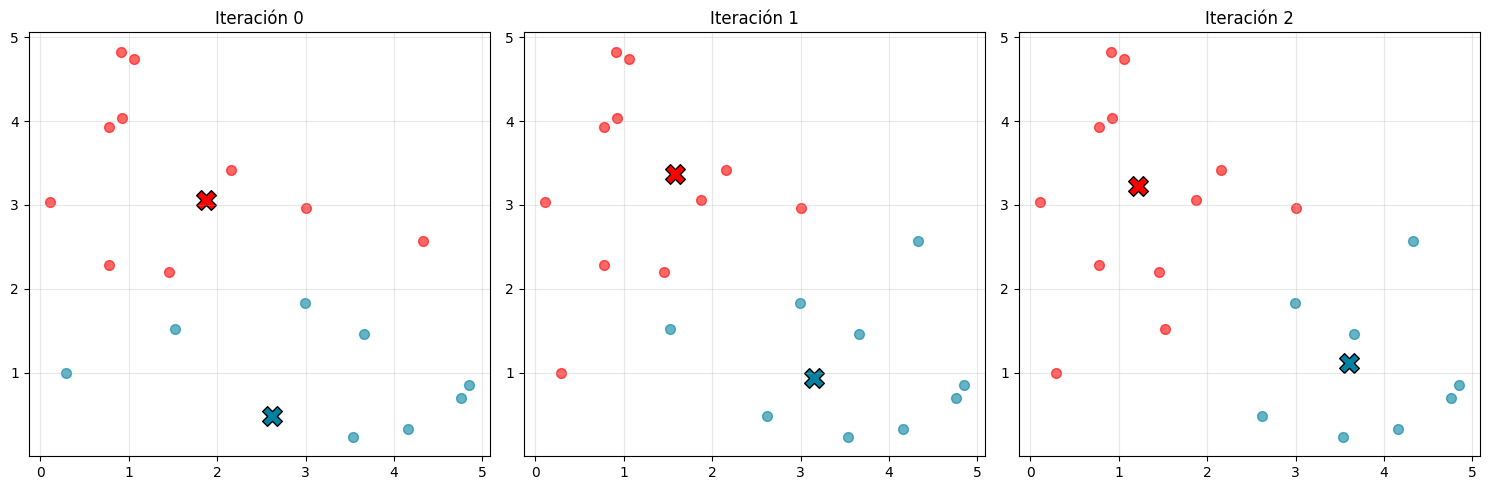

In [16]:
print("🎉 TEST FINAL: Ejecución completa de K-Means")

# Generar datos reales
puntos_reales = generar_puntos_2d(20, random_state=42)
print(f"Dataset generado: {puntos_reales.shape}")

# Crear y ajustar modelo
kmeans_final = KMeans(n_clusters=2, random_state=42, max_iter=100, tol=1e-4)
kmeans_final.ajustar(puntos_reales)

# Resultados finales
print(f"\n📈 RESULTADOS FINALES:")
print(f"Número de iteraciones: {kmeans_final.n_iter_}")
print(f"Inercia final: {kmeans_final.inercia_:.4f}")
print(f"Centroides finales:\n{kmeans_final.centroides}")

# Distribución de puntos por cluster
clusters_unicos, conteos = np.unique(kmeans_final.labels, return_counts=True)
print(f"\n📊 DISTRIBUCIÓN DE CLUSTERS:")
for cluster, count in zip(clusters_unicos, conteos):
    print(f"  Cluster {cluster}: {count} puntos")

# Probar predicción
if len(puntos_reales) > 0:
    puntos_nuevos = np.array([[2.0, 2.0], [4.0, 4.0]])
    predicciones = kmeans_final.predecir(puntos_nuevos)
    print(f"\n🎯 PREDICCIÓN PARA NUEVOS PUNTOS:")
    for i, punto in enumerate(puntos_nuevos):
        print(f"  Punto {punto} -> Cluster {predicciones[i]}")


def visualizar_proceso_kmeans(puntos: np.ndarray, historial_centroides: list, labels_final: np.ndarray):
    """Visualiza el proceso iterativo de K-Means"""
    n_iter = len(historial_centroides) - 1
    fig, axes = plt.subplots(1, min(3, n_iter), figsize=(15, 5))
    
    if n_iter == 1:
        axes = [axes]
    
    colores = ["#FF0000", "#0081A1", "#0400DD"]
    
    for i, ax in enumerate(axes):
        if i < n_iter:
            centroides = historial_centroides[i]
            labels = kmeans_final._asignar_clusters(puntos, centroides)
            
            for cluster_idx in range(len(centroides)):
                puntos_cluster = puntos[labels == cluster_idx]
                ax.scatter(puntos_cluster[:, 0], puntos_cluster[:, 1], 
                          c=colores[cluster_idx], alpha=0.6, s=50)
                ax.scatter(centroides[cluster_idx, 0], centroides[cluster_idx, 1],
                          c=colores[cluster_idx], marker='X', s=200, edgecolors='black')
            
            ax.set_title(f'Iteración {i}')
            ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualizar proceso si tenemos historial
if hasattr(kmeans_final, 'historial_centroides') and len(kmeans_final.historial_centroides) > 1:
    visualizar_proceso_kmeans(puntos_reales, kmeans_final.historial_centroides, kmeans_final.labels)


&emsp;&emsp;3.2 Tome los tres puntos restantes y clasifíquelos en los grupos obtenidos anteriormente usando el algoritmo Knn. Utilice distintos valores de K y anote lo que observa con esta elección.

In [5]:
class KNN:
    def __init__(self, k: int = 3):
        """
        Inicializa el algoritmo K-Nearest Neighbors.
        
        Parameteros:
            *k: Número de vecinos a considerar)
        """
        self.k = k
        self.X_entrenamiento = None # Caracteristicas (x, y)
        self.y_entrenamiento = None # Etiquetas (clusters)
    
    def ajustar(self, puntos_etiquetados: np.ndarray) -> 'KNNSimple':
        """
        Ajusta el modelo con puntos ya etiquetados.
        
        Parameters:
        -----------
        puntos_etiquetados : np.ndarray shape (n, 3)
            Array con [x, y, etiqueta]
        """
        # Separar características (x,y) y etiquetas
        self.X_entrenamiento = puntos_etiquetados[:, :2]  # Coordenadas x, y
        self.y_entrenamiento = puntos_etiquetados[:, 2]   # Etiquetas de cluster
        
        print(f"✅ KNN ajustado con {len(self.X_entrenamiento)} puntos etiquetados")
        print(f"   - Características: {self.X_entrenamiento.shape}")
        print(f"   - Etiquetas únicas: {np.unique(self.y_entrenamiento)}")
        
        return self
    
    def _calcular_distancias(self, punto: np.ndarray) -> np.ndarray:
        """
        Calcula distancias euclideanas desde un punto a todos los de entrenamiento.
        """
        diferencias = self.X_entrenamiento - punto
        distancias = np.sqrt(np.sum(diferencias ** 2, axis=1))
        return distancias
    
    def predecir(self, puntos_prueba: np.ndarray) -> np.ndarray:
        """
        Predice clusters para nuevos puntos.
        
        Parameters:
        -----------
        puntos_prueba : np.ndarray shape (n, 2)
            Puntos a clasificar [x, y]
            
        Returns:
        --------
        etiquetas_predichas : np.ndarray shape (n,)
            Etiquetas predichas para cada punto
        """
        if self.X_entrenamiento is None:
            raise ValueError("El modelo debe ser ajustado antes de predecir")
        
        etiquetas_predichas = []
        
        for punto in puntos_prueba:
            # 1. Calcular distancias a todos los puntos de entrenamiento
            distancias = self._calcular_distancias(punto)
            
            # 2. Obtener índices de los k vecinos más cercanos
            indices_vecinos = np.argsort(distancias)[:self.k]
            
            # 3. Obtener etiquetas de los vecinos
            etiquetas_vecinos = self.y_entrenamiento[indices_vecinos]
            
            # 4. Votación mayoritaria
            etiquetas_unicas, conteos = np.unique(etiquetas_vecinos, return_counts=True)
            etiqueta_predicha = etiquetas_unicas[np.argmax(conteos)]
            
            etiquetas_predichas.append(etiqueta_predicha)
            
            # Debug opcional
            print(f"   Punto {punto}: {self.k} vecinos más cercanos -> Cluster {etiqueta_predicha}")
            print(f"     Distancias: {distancias[indices_vecinos]}")
            print(f"     Etiquetas vecinos: {etiquetas_vecinos}")
        
        return np.array(etiquetas_predichas)

📊 DATOS GENERADOS:
Puntos totales: (23, 2)
Entrenamiento: (20, 2)
Prueba: (3, 2)
🚀 Iniciando K-Means con 2 clusters
Puntos: (20, 2), Centroides iniciales: (2, 2)
Iteración 1: Movimiento = 1.040888, Inercia = 68.8310
Iteración 2: Movimiento = 0.776624, Inercia = 60.8684
Iteración 3: Movimiento = 0.627137, Inercia = 55.0539
Iteración 4: Movimiento = 0.212525, Inercia = 54.5214
Iteración 5: Movimiento = 0.292485, Inercia = 53.4854
Iteración 6: Movimiento = 0.000000, Inercia = 53.4854
✅ Convergencia alcanzada en 6 iteraciones
🎯 Ajuste completado en 6 iteraciones
Inercia final: 53.4854

🎯 PUNTOS ETIQUETADOS POR K-MEANS:
Forma: (20, 3)
Primeros 5 puntos:
  (1.87, 1.83) -> Cluster 1
  (4.75, 2.28) -> Cluster 0
  (3.66, 3.93) -> Cluster 0
  (2.99, 1.00) -> Cluster 1
  (0.78, 2.57) -> Cluster 1

🔍 Probando KNN con k=1
------------------------------
✅ KNN ajustado con 20 puntos etiquetados
   - Características: (20, 2)
   - Etiquetas únicas: [0. 1.]
   Punto [3.05926447 4.54660201]: 1 vecinos má

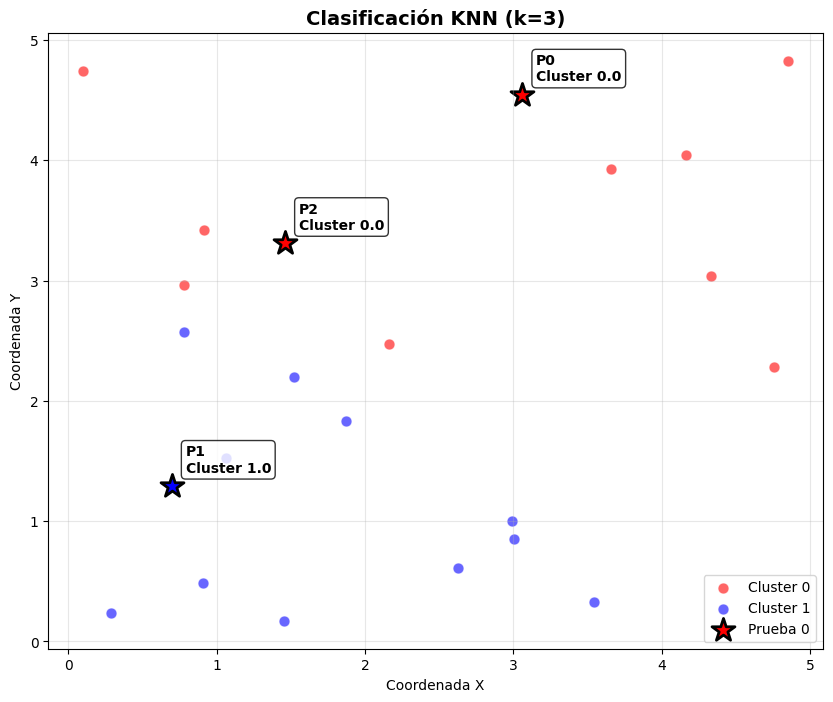

In [10]:
def probar_diferentes_k(puntos_etiquetados: np.ndarray, puntos_prueba: np.ndarray, valores_k: list):
    """
    Prueba KNN con diferentes valores de k y compara resultados.
    """
    resultados = {}
    
    for k in valores_k:
        print(f"\n🔍 Probando KNN con k={k}")
        print("-" * 30)
        
        knn = KNN(k=k)
        knn.ajustar(puntos_etiquetados)
        predicciones = knn.predecir(puntos_prueba)
        
        resultados[k] = predicciones
        
        print(f"📊 Resultados para k={k}:")
        for i, punto in enumerate(puntos_prueba):
            print(f"   Punto {punto} -> Cluster {predicciones[i]}")
    
    return resultados


# Generar datos
puntos = generar_puntos_2d(23, random_state=42)
entrenamiento, prueba = dividir_datset(puntos, n_entrenamiento=20)

print("📊 DATOS GENERADOS:")
print(f"Puntos totales: {puntos.shape}")
print(f"Entrenamiento: {entrenamiento.shape}")
print(f"Prueba: {prueba.shape}")

# Aplicar K-Means para obtener clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.ajustar(entrenamiento)

# Obtener puntos etiquetados
puntos_etiquetados = kmeans.obtener_puntos_etiquetados()

print(f"\n🎯 PUNTOS ETIQUETADOS POR K-MEANS:")
print(f"Forma: {puntos_etiquetados.shape}")
print("Primeros 5 puntos:")
for i in range(min(5, len(puntos_etiquetados))):
    x, y, cluster = puntos_etiquetados[i]
    print(f"  ({x:.2f}, {y:.2f}) -> Cluster {int(cluster)}")

# Probar KNN con diferentes valores de k
valores_k = [1, 3, 5, 7]
resultados = probar_diferentes_k(puntos_etiquetados, prueba, valores_k)

# Mostrar resumen comparativo
print("\n" + "="*50)
print("📈 RESUMEN COMPARATIVO")
print("="*50)

for i, punto in enumerate(prueba):
    print(f"\nPunto de prueba {i}: ({punto[0]:.2f}, {punto[1]:.2f})")
    for k in valores_k:
        cluster = resultados[k][i]
        print(f"  k={k} -> Cluster {cluster}")


def visualizar_knn_simple(
    puntos_entrenamiento: np.ndarray,
    labels_entrenamiento: np.ndarray,
    puntos_prueba: np.ndarray,
    labels_prueba: np.ndarray,
    titulo: str = "Clasificación KNN"
):
    """
    Visualización simple de los resultados de KNN.
    """
    plt.figure(figsize=(10, 8))
    colores = ["#FF0000", "#0400FF", "#728AF5"]
    
    # Graficar puntos de entrenamiento por cluster
    clusters_unicos = np.unique(labels_entrenamiento)
    for cluster in clusters_unicos:
        puntos_cluster = puntos_entrenamiento[labels_entrenamiento == cluster]
        plt.scatter(
            puntos_cluster[:, 0], puntos_cluster[:, 1],
            c=colores[int(cluster) % len(colores)],
            label=f'Cluster {cluster}',
            alpha=0.6,
            s=60,
            edgecolors='white',
            linewidth=0.5
        )
    
    # Graficar puntos de prueba
    for i, punto in enumerate(puntos_prueba):
        cluster = labels_prueba[i]
        plt.scatter(
            punto[0], punto[1],
            c=colores[int(cluster) % len(colores)],
            marker='*',
            s=300,
            label=f'Prueba {i}' if i == 0 else "",
            edgecolors='black',
            linewidth=2
        )
        
        # Añadir etiqueta
        plt.annotate(
            f'P{i}\nCluster {cluster}',
            (punto[0], punto[1]),
            xytext=(10, 10),
            textcoords='offset points',
            fontsize=10,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8)
        )
    
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Visualizar para un valor específico de k (por ejemplo k=3)
knn_final = KNN(k=3)
knn_final.ajustar(puntos_etiquetados)
predicciones_finales = knn_final.predecir(prueba)

visualizar_knn_simple(
    entrenamiento,
    kmeans.labels,
    prueba,
    predicciones_finales,
    "Clasificación KNN (k=3)"
)

4. La imagen mostrada abajo muestra una red de salas y cómo se comunican entre ellas. Implemente un algoritmo Q-Learning con un factor despreciativo $γ = 0.9$. La matriz de recompensas debe asignar un valor de 0 a cada camino accesible y un valor de 100 a caminos que lleven a la sala del tesoro.

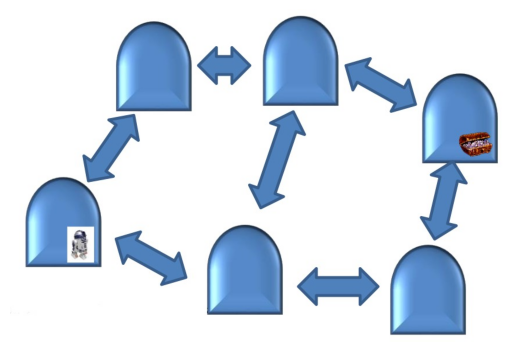

In [2]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1dkDruEIPa7f-BAmjI47TZl3bxaqYf6a9"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

&emsp;&emsp;4.1 Dibuje un diagrama con la asignación de recompensas correspondiente a cada estado.

&emsp;&emsp;4.2 Diseñe y muestre la matriz de recompensas.

&emsp;&emsp;4.3 Obtenga la matriz Q óptima, normalícela respecto al valor máximo encontrado y grafique la política obtenida en el diagrama mostrado inicialmente.

### Aprendizaje Q

**4.1 Diagrama de Asignación de recompensas**

!["Diagrama de recompensas"](Diagrama_Recompensas.png)

**4.2 Matriz de Recompensas**

R = [
    
    #S0  S1  S2  S3  S4  S5
    
    [-1, 0, -1, -1, 0, -1],    # Desde 0 (Robot)
    
    [0, -1, 0, -1, -1, -1],    # Desde 1
    
    [-1, 0, -1, 100, 0, -1],   # Desde 2
    
    [-1, -1, 0, 100, -1, 0],   # Desde 3 (Tesoro)
    
    [0, -1, 0, -1, -1, 0],     # Desde 4
    
    [-1, -1, -1, 100, 0, -1];  # Desde 5
]

**4.3 Matriz Q Óptima, Normalizada y Grafica de Resultados**

Para este inciso, usaremos lo siguiente:

Q(s,a)=R(s,a)+ γ  max(Q(s’, A)), con $γ = 0.9$

**Matriz Q Óptima**

El valor máximo de Q que se puede obtener a partir de S3 es de 100, por lo que maxQ(3, A) = 100.

Para formar la matriz Q óptima, primero cálculamos con los estados directos a la meta, S2 y S5:

 * Q(S2,S3)= 100 + 0.9 ⋅ 100 = 190

 * Q(S5,S3)= 100 + 0.9 ⋅ 100 = 190

Ahora, con los estados vecinos a S2 y S5, S1 y S4:

 * De S1 a S2: Q(S1,S2) = 0+ 0.9 ⋅ 190 = 171

 Para S4, puede ir a S2 o S5:

 * Q(S4,S2) = 0 + 0.9 ⋅ 190 = 171

 * Q(S4,S5)= 0 + 0.9 ⋅ 190 = 171

Por último, el estado inicial S0, donde esta R2-D2 al inicio:

 Para S0, hacia S1 o S4:
 
 * Q(S0,S1) = 0 + 0.9 ⋅ 171 = 153.9
 
 * Q(S0,S4) = 0 + 0.9 ⋅ 171 = 153.9

Para el caso de que ya este en S3, y se quede en S3:

 * Q(S3,S3) = 100 + 0.9 ⋅ 100 = 190
 
Matriz Q Óptima:

Q(s,a) =
       
        [0, 153.9, 0, 0, 153.9, 0],    # Desde 0 (Robot)
     
        [0, 0, 171, 0, 0, 0],          # Desde 1
    
        [0, 0, 0, 190, 0, 0],          # Desde 2
    
        [0, 0, 0, 190, 0, 0],          # Desde 3 (Tesoro)
    
        [0, 0, 171, 0, 0, 171],        # Desde 4
    
        [0, 0, 0, 190, 0, 0];          # Desde 5

En este ejercicio, al momento de calcular la matriz Q óptima, solo tuvimos en cuenta los caminos posibles, referidos a 0 o 100, debido a que los valores de -1 se refieren a caminos no posibles, por lo que directamente no fueron considerados al momento de armar la matriz Q óptima.

**Normalización**

El valor máximo encontrado es 190, asi que para obtener la matriz normalizada debemos dividir todos los valores de la matriz Q óptima por este valor.

Normalizada:

Qn(s,a) = 
           
        [0, 0.81, 0, 0, 0.81 , 0],   
     
        [0, 0, 0.90, 0, 0, 0],         
    
        [0, 0, 0, 1.00, 0, 0],         
    
        [0, 0, 0, 1.00, 0, 0],          
    
        [0, 0, 0.90, 0, 0, 0.90],        
    
        [0, 0, 0, 1, 0, 0];          

**Gráfica de Política Obtenida**
    
!["Gráfica de Resultados"](Grafica_Politica.png)

---


# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2017) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)